In [22]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LeakyReLU
from keras import models, layers
from PIL import Image
import random
from pathlib import Path
import matplotlib.pyplot as plt

In [23]:
labels = os.listdir('../input/natural-images/data/natural_images/')
print(labels)

['motorbike', 'airplane', 'flower', 'dog', 'fruit', 'car', 'cat', 'person']


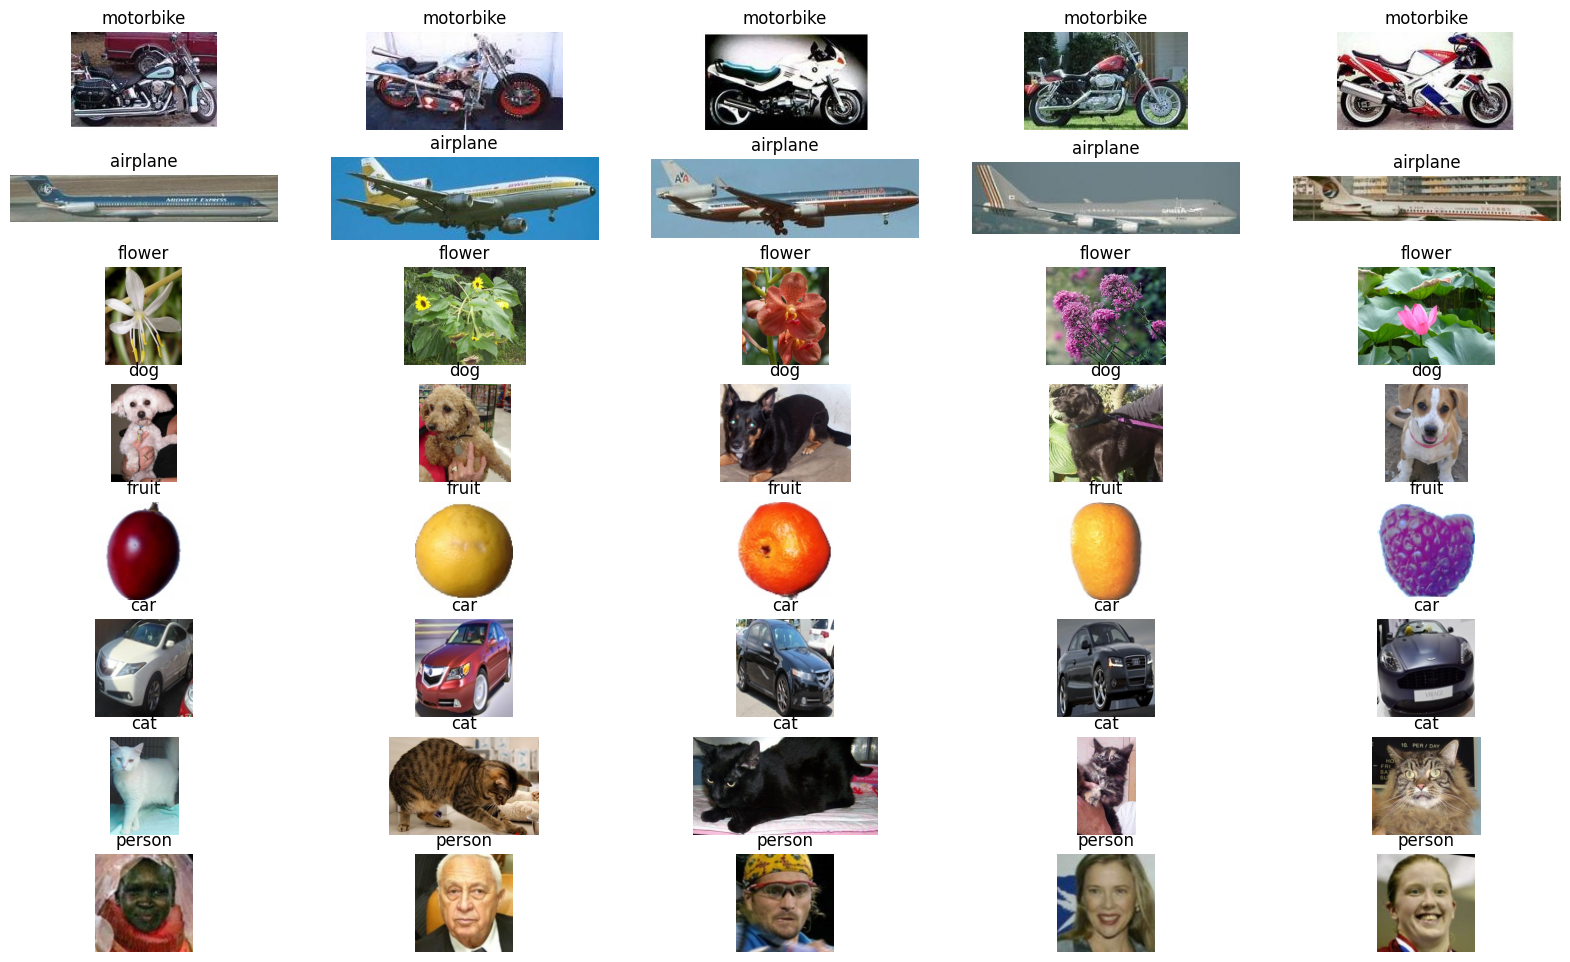

In [24]:
labels = os.listdir('../input/natural-images/data/natural_images/')
path = Path('/kaggle/input/natural-images/natural_images')
def displayRandomImagesFromEveryFolder(directory=path, samplesPerFolder=5):

    fig = plt.figure(figsize=(20,15))

    for rowIndex in range(1, 9):
        subdirectory = str(rowIndex)
        path = directory/labels[rowIndex -1]
        images = os.listdir(path)
        for sampleIndex in range(1,samplesPerFolder+1):
            randomNumber = random.randint(0, len(images)-1)
            image = Image.open(path/images[randomNumber])
            ax = fig.add_subplot(10, 5, samplesPerFolder*rowIndex + sampleIndex)
            ax.axis("off")

            plt.title(str(labels[rowIndex -1]))
            plt.imshow(image, cmap='gray')

    plt.show()

displayRandomImagesFromEveryFolder()

In [25]:
x_data =[]
y_data = []
import cv2
for label in labels:
    path = '../input/natural-images/data/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path)
        image_resized = cv2.resize(image, (64,64))
        x_data.append(np.array(image_resized))
        y_data.append(label)

In [26]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [27]:
x_data = x_data.astype('float32')/255

In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(y_data)
#from keras.utils import to_categorical
y_categorical = to_categorical(y_encoded)

In [30]:
r = np.arange(x_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = x_data[r]
Y = y_categorical[r]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

In [56]:
from keras import models, layers
from keras.layers import LeakyReLU

model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(filters=32, padding='same', kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Second convolutional layer with LeakyReLU activation
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3)))
model.add(LeakyReLU(alpha=0.02))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Dropout(rate=0.25))

# Flatten the feature map for the dense layers
model.add(layers.Flatten())

# Dense fully connected layer
model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dropout(rate=0.25))

model.add(layers.Dense(8, activation='softmax'))

opt_2 = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
    loss='categorical_crossentropy', 
    optimizer=opt_2, 
    metrics=['accuracy'])

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 27, 27, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │     2,769,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,864,456 (10.93 MB)

 Trainable params: 2,864,456 (10.93 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
import matplotlib.pyplot as plt
    # create accuracy sublpot
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """
    plt.figure(figsize=(20, 15))
    fig, axs = plt.subplots(2) 
    fig.tight_layout(pad=3.0)
    axs[0].plot(history.history["accuracy"], label="train accuracy",color="green")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy",color='blue')
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error",color="red")
    axs[1].plot(history.history["val_loss"], label="test error",color='orange')
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    plt.show()

Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 57s 397ms/step - accuracy: 0.4233 - loss: 1.6030 - val_accuracy: 0.7663 - val_loss: 0.6352
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 55s 401ms/step - accuracy: 0.7669 - loss: 0.6312 - val_accuracy: 0.8134 - val_loss: 0.4714
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 81s 394ms/step - accuracy: 0.8270 - loss: 0.4807 - val_accuracy: 0.8560 - val_loss: 0.3793
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 55s 397ms/step - accuracy: 0.8641 - loss: 0.3828 - val_accuracy: 0.8696 - val_loss: 0.3701
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 55s 400ms/step - accuracy: 0.8822 - loss: 0.3076 - val_accuracy: 0.8569 - val_loss: 0.3760
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 54s 393ms/step - accuracy: 0.8922 - loss: 0.2923 - val_accuracy: 0.8813 - val_loss: 0.3049
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 82s 396ms/step - accuracy: 0.9283 - loss: 0.2058 - val_accuracy: 0.8976 - val_loss: 0.3074
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 55s 397ms/step - accuracy: 0.9311 - loss: 0

<Figure size 2000x1500 with 0 Axes>

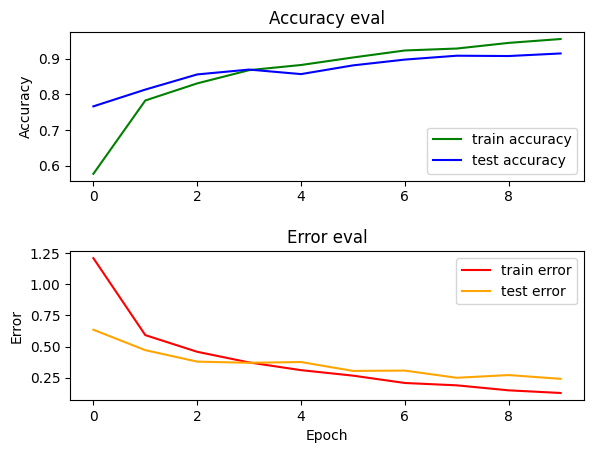

In [57]:
history=model.fit(X_train, Y_train, epochs=10, validation_split=0.2)
plot_history(history)

In [58]:
model.evaluate(X_test, Y_test)
y_predicted = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.9005 - loss: 0.2766
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step


In [59]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Convert predicted probabilities to class labels
# Assuming this is a multi-class problem with softmax output
y_predicted_classes = np.argmax(y_predicted, axis=1)

# Step 3: Convert Y_test from one-hot encoding to class labels
Y_test_classes = np.argmax(Y_test, axis=1)

# Step 6: Generate classification report
report = classification_report(Y_test_classes, y_predicted_classes)
print("\nClassification Report:")
print(report)



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       157
           1       0.99      0.92      0.95       175
           2       0.71      0.75      0.73       169
           3       0.64      0.59      0.62       138
           4       0.89      0.93      0.91       173
           5       0.99      1.00      0.99       198
           6       0.95      0.98      0.97       161
           7       0.96      1.00      0.98       209

    accuracy                           0.90      1380
   macro avg       0.89      0.89      0.89      1380
weighted avg       0.90      0.90      0.90      1380



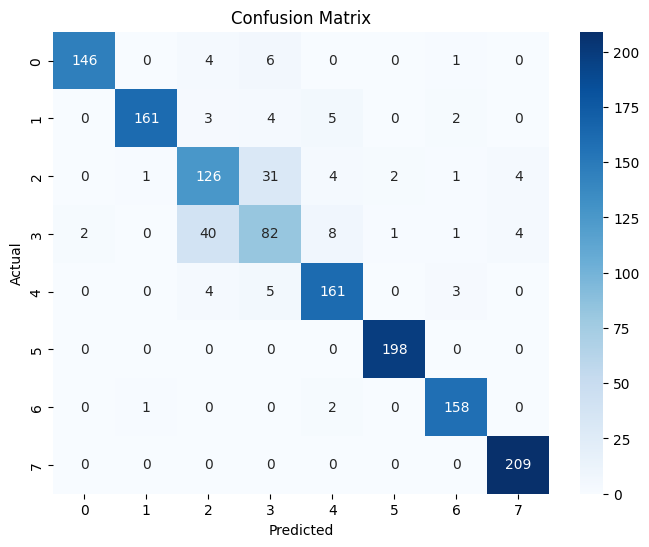

In [60]:
cm = confusion_matrix(Y_test_classes, y_predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_test_classes), yticklabels=np.unique(Y_test_classes))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
